# Capstone Part 4 - Data Preprocessing / Modelling

In [26]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [27]:
combhotel_clean_df = pd.read_csv('combhotel_clean_df_v2.csv')

In [28]:
combhotel_clean_df.sample(3)

,hotel,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ArrivalDate,IsCanceled,ADR_bin,got_assigned_room
80084,city hotel,207,2017,April,18,30,2,5,2,0,...,Transient,99.0,0,3,Check-Out,2017-05-07,2017-04-30,False,51-100,True
38948,city hotel,104,2016,April,16,15,2,2,1,0,...,Transient,76.5,0,0,Canceled,2016-03-08,2016-04-15,True,51-100,True
33398,resort hotel,115,2017,August,35,28,1,4,2,0,...,Transient,191.0,0,1,Check-Out,2017-09-02,2017-08-28,False,151-200,True


In [29]:
combhotel_clean_df.columns

Index(['hotel', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'ArrivalDate', 'IsCanceled', 'ADR_bin', 'got_assigned_room'],
      dtype='object')

In [30]:
numerical_columns = ['LeadTime', 'StaysInWeekendNights','StaysInWeekNights','Adults','Children',
                   'Babies','PreviousCancellations','PreviousBookingsNotCanceled', 'BookingChanges',
                   'DaysInWaitingList','ADR','RequiredCarParkingSpaces','TotalOfSpecialRequests']

binary_columns = ['IsCanceled', 'IsRepeatedGuest', 'got_assigned_room']

categorical_columns = ['hotel','Meal', 'Country', 'MarketSegment', 'DistributionChannel',
                       'ReservedRoomType', 'AssignedRoomType','DepositType', 'Agent', 'Company',
                       'CustomerType','ReservationStatus', 'ADR_bin']

date_not_datetime_columns = ['ArrivalDateYear','ArrivalDateMonth','ArrivalDateWeekNumber','ArrivalDateDayOfMonth']

datetime_columns = ['ReservationStatusDate','ArrivalDate']

# Preprocessing

Selecting feature columns

In [31]:
feature_cols = ['hotel','ADR', 'LeadTime', 'ArrivalDateMonth','StaysInWeekendNights', 'StaysInWeekNights','MarketSegment',
                'DistributionChannel','IsRepeatedGuest','CustomerType','got_assigned_room']

cat_cols = ['hotel', 'ArrivalDateMonth','MarketSegment','DistributionChannel','CustomerType']

binary_cols =  ['IsRepeatedGuest','got_assigned_room']

num_cols = ['LeadTime','StaysInWeekendNights','StaysInWeekNights', 'ADR']

In [32]:
combhotel_preprocess_df = combhotel_clean_df[feature_cols]

**one-hot encode**

In [33]:
for col in cat_cols:
    combhotel_preprocess_df = pd.concat([combhotel_preprocess_df,pd.get_dummies(combhotel_preprocess_df[col], prefix= col, drop_first= True)],axis = 1)

Dropping original category columns

In [34]:
combhotel_preprocess_df = combhotel_preprocess_df.drop(cat_cols,axis = 1)

In [35]:
combhotel_preprocess_df.columns

Index(['ADR', 'LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights',
       'IsRepeatedGuest', 'got_assigned_room', 'hotel_resort hotel',
       'ArrivalDateMonth_August', 'ArrivalDateMonth_December',
       'ArrivalDateMonth_February', 'ArrivalDateMonth_January',
       'ArrivalDateMonth_July', 'ArrivalDateMonth_June',
       'ArrivalDateMonth_March', 'ArrivalDateMonth_May',
       'ArrivalDateMonth_November', 'ArrivalDateMonth_October',
       'ArrivalDateMonth_September', 'MarketSegment_Complementary',
       'MarketSegment_Corporate', 'MarketSegment_Direct',
       'MarketSegment_Groups', 'MarketSegment_Offline TA/TO',
       'MarketSegment_Online TA', 'DistributionChannel_Direct',
       'DistributionChannel_GDS', 'DistributionChannel_TA/TO',
       'CustomerType_Group', 'CustomerType_Transient',
       'CustomerType_Transient-Party'],
      dtype='object')

## train_test_split


In [36]:
X = combhotel_preprocess_df
y = combhotel_clean_df['IsCanceled']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling Features

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns, index = X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns, index = X_test.index)

## Training a model using KNN

In [40]:
# searching for the best K to give higest accuracy
accuracy_list = []
for k in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    y_pred_class = knn.predict(X_test_scaled)
    accuracy_list.append(metrics.accuracy_score(y_test,y_pred_class))

accuracy_result = pd.DataFrame({'K':range(1,101), 'accuracy':accuracy_list})

In [41]:
accuracy_result.sort_values('accuracy',ascending=False)

,K,accuracy
22,23,0.745744
23,24,0.745572
19,20,0.745514
18,19,0.745227
21,22,0.745112
...,...,...
8,9,0.738498
6,7,0.735565
4,5,0.732459
2,3,0.723027


In [42]:
fig = px.line(accuracy_result, x = 'K', y = 'accuracy')
fig.show()

When K = 23, Accuracy is highest

In [51]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train_scaled,y_train)

,n_neighbors,23
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [52]:
y_pred = knn.predict(X_test_scaled)

## Evaluation of Model

In [53]:
print(f'accuracy score: {metrics.accuracy_score(y_test,y_pred)}')
print(f'recall score: {metrics.recall_score(y_test,y_pred)}')
print(f'precision score: {metrics.precision_score(y_test,y_pred)}')
print(f'f1 score: {metrics.f1_score(y_test,y_pred)}')

accuracy score: 0.7457441913963653
recall score: 0.31401475237091675
precision score: 0.5609939759036144
f1 score: 0.40264829077151737


## Confusion matrix

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [47]:
cm = confusion_matrix(y_test, y_pred)

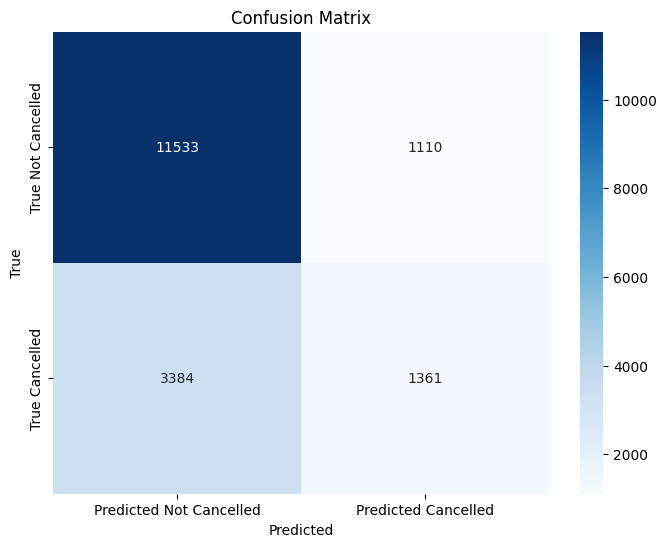

In [48]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Cancelled', 'Predicted Cancelled'], yticklabels=['True Not Cancelled', 'True Cancelled'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Exploring what is the highest possible recall score and what is the corressponding K

In [49]:
# searching for the best K to give higest recall
recall_list = []
for k in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    y_pred_class = knn.predict(X_test_scaled)
    recall_list.append(metrics.recall_score(y_test,y_pred_class))

recall_result = pd.DataFrame({'K':range(1,101), 'recall':recall_list})

In [50]:
recall_result.sort_values('recall',ascending=False)

,K,recall
0,1,0.468493
2,3,0.421075
4,5,0.394731
6,7,0.377028
8,9,0.363330
...,...,...
91,92,0.213699
93,94,0.211380
95,96,0.209062
97,98,0.206112


the highest recall score is 0.46 and to achieve this result the K is 1 which is not a feasible choice as it is very vulnearble to noise and outliers. With this consideration, K=8 is the best parameter. And unfortunately recall is only 0.288, which means it may not be suitable for this business case.